In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm

# Read the data from the CSV file
data = pd.read_csv("C:/Users/justi/Downloads/7cities/7cities/impact_of_rainfall_on_sharedbike.csv")

In [2]:
font_prop = fm.FontProperties(family='Arial')

In [3]:
# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [4]:
# Extract the relevant columns for each city
nyc_data = data[["Date", "NYC_Rainfall_Times10", "NYC_travel_demand"]]
bos_data = data[["Date", "BOS_Rainfall_Times10", "BOS_travel_demand"]]
chi_data = data[["Date", "CHI_Rainfall_Times10", "CHI_travel_demand"]]
wdc_data = data[["Date", "WDC_Rainfall_Times10", "WDC_travel_demand"]]
la_data = data[["Date", "LA_Rainfall_Times10", "LA_travel_demand"]]
phi_data = data[["Date", "PHI_Rainfall_Times10", "PHI_travel_demand"]]
sfo_data = data[["Date", "SFO_Rainfall_Times10", "SFO_travel_demand"]]

C:\Users\justi\AppData\Local\Temp\ipykernel_12044\256888270.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


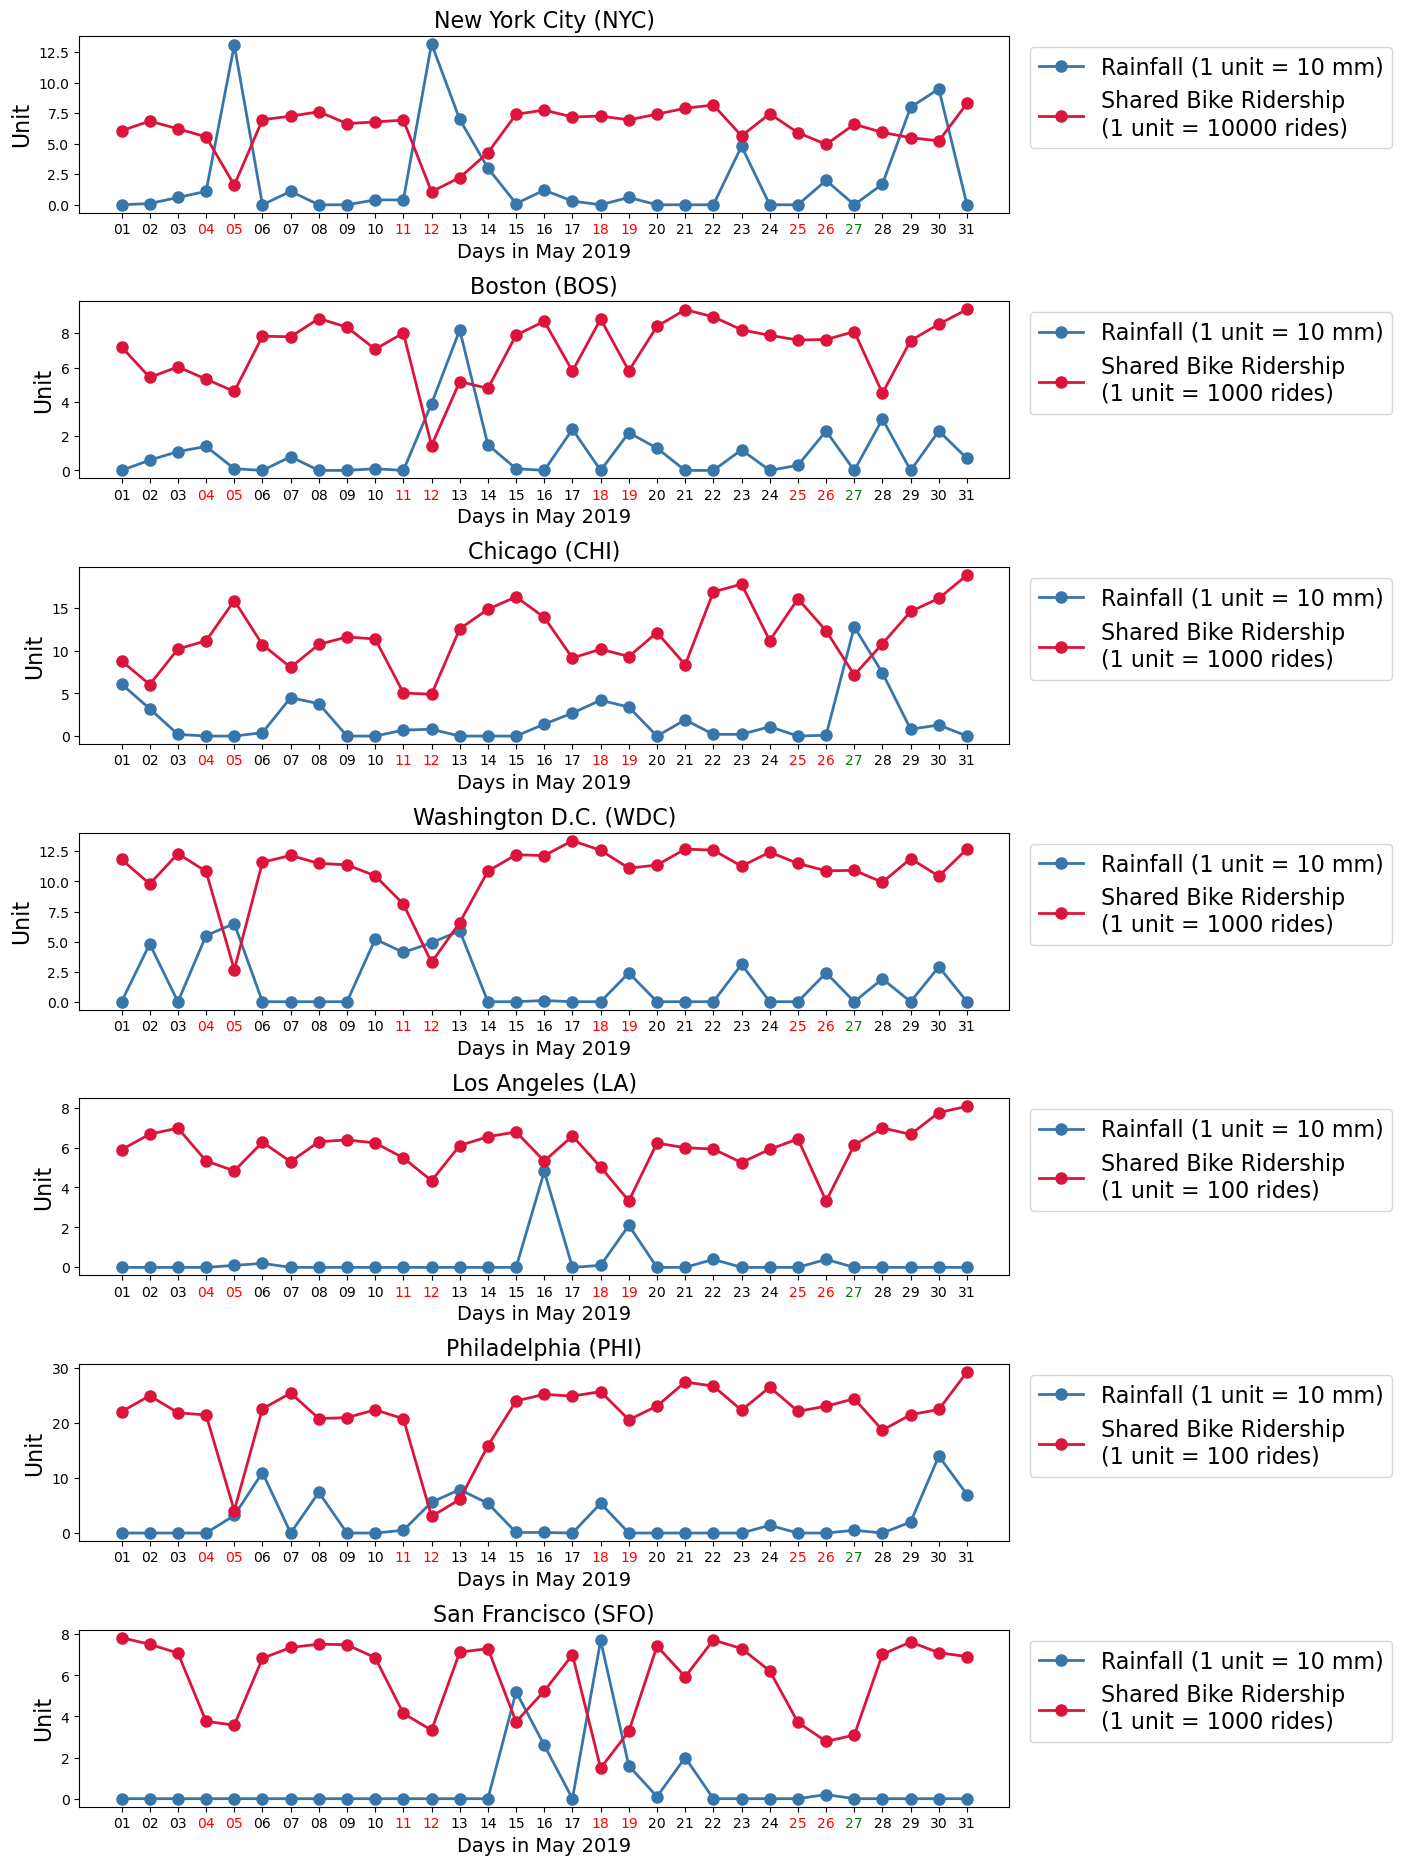

In [5]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
font_prop = fm.FontProperties(family='Arial')

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(12, 23), gridspec_kw={'hspace': 0.5})

colors = ['crimson', 'crimson', 'crimson', 'crimson', 'crimson', 'crimson', 'crimson']
cities = ['NYC', 'BOS', 'CHI', 'WDC', 'LA', 'PHI', 'SFO']
city_names = ['New York City (NYC)', 'Boston (BOS)', 'Chicago (CHI)', 'Washington D.C. (WDC)', 'Los Angeles (LA)', 'Philadelphia (PHI)', 'San Francisco (SFO)']
data_list = [nyc_data, bos_data, chi_data, wdc_data, la_data, phi_data, sfo_data]

legend_units = {
    'NYC': {'rainfall': '1 unit = 10 mm', 'ridership': '1 unit = 10000 rides'},
    'BOS': {'rainfall': '1 unit = 10 mm', 'ridership': '1 unit = 1000 rides'},
    'CHI': {'rainfall': '1 unit = 10 mm', 'ridership': '1 unit = 1000 rides'},
    'WDC': {'rainfall': '1 unit = 10 mm', 'ridership': '1 unit = 1000 rides'},
    'LA': {'rainfall': '1 unit = 10 mm', 'ridership': '1 unit = 100 rides'},
    'PHI': {'rainfall': '1 unit = 10 mm', 'ridership': '1 unit = 100 rides'},
    'SFO': {'rainfall': '1 unit = 10 mm', 'ridership': '1 unit = 1000 rides'},
}

for i, ax in enumerate(axes):
    city = cities[i]
    city_name = city_names[i]
    filtered_data = data_list[i][(data_list[i]['Date'].dt.month == 5) & (data_list[i]['Date'].dt.year == 2019)]
    ax.plot(filtered_data['Date'], filtered_data[city+'_Rainfall_Times10'],  'o-', color='#3776ab', label='Rainfall ('+legend_units[city]['rainfall']+')',  linewidth=2, markersize=8)
    ax.plot(filtered_data['Date'], filtered_data[city+'_travel_demand'], 'o-', color=colors[i], label='Shared Bike Ridership\n('+legend_units[city]['ridership']+')',  linewidth=2, markersize=8)
    ax.set_xlabel('Days in May 2019', fontsize=14)
    ax.set_ylabel('Unit', fontsize=16)
    ax.set_title(city_name, fontsize=16) # fontweight='bold'
    ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize="16")
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
    ax.set_xticks(ax.get_xticks()[1:-1])

    xtick_labels = ax.get_xticklabels()
    for label in xtick_labels:
        day_str = label.get_text()
        day = int(day_str)
        month = filtered_data['Date'].dt.month.iloc[0]
        year = filtered_data['Date'].dt.year.iloc[0]
        date = datetime.datetime(year, month, day)
        if date.weekday() >= 5:
            label.set_color('red')
        if day == 27:
            label.set_color('green')
        #ax.axhline(y=0, color='gold', linestyle='--')

plt.tight_layout()
plt.savefig('rainfall.png', dpi=300, bbox_inches = 'tight')
plt.show()